In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [163]:
df = pd.read_csv("/kaggle/input/amazon-stock-price-all-time/Amazon.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200


In [149]:
df.isnull().sum().sum()

0

In [150]:
df["Date"] = pd.to_datetime(df["Date"])

df["day"] = df["Date"].dt.day
df["month"] = df["Date"].dt.month
df["year"] = df["Date"].dt.year
df["weekdays"] = df["Date"].dt.day_name()

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6155 entries, 0 to 6154
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       6155 non-null   datetime64[ns]
 1   Open       6155 non-null   float64       
 2   High       6155 non-null   float64       
 3   Low        6155 non-null   float64       
 4   Close      6155 non-null   float64       
 5   Adj Close  6155 non-null   float64       
 6   Volume     6155 non-null   int64         
 7   day        6155 non-null   int32         
 8   month      6155 non-null   int32         
 9   year       6155 non-null   int32         
 10  weekdays   6155 non-null   object        
dtypes: datetime64[ns](1), float64(5), int32(3), int64(1), object(1)
memory usage: 456.9+ KB


In [152]:
df = df.drop(columns="Date")
df.head()

,Open,High,Low,Close,Adj Close,Volume,day,month,year,weekdays
0,2.437500,2.500000,1.927083,1.958333,1.958333,72156000,15,5,1997,Thursday
1,1.968750,1.979167,1.708333,1.729167,1.729167,14700000,16,5,1997,Friday
2,1.760417,1.770833,1.625000,1.708333,1.708333,6106800,19,5,1997,Monday
3,1.729167,1.750000,1.635417,1.635417,1.635417,5467200,20,5,1997,Tuesday
4,1.635417,1.645833,1.375000,1.427083,1.427083,18853200,21,5,1997,Wednesday


In [153]:
df = pd.get_dummies(data = df,drop_first = True,dtype = np.int32,columns = ["weekdays"])

In [154]:
df = df.drop(columns = "Adj Close")

In [155]:
df.head()

,Open,High,Low,Close,Volume,day,month,year,weekdays_Monday,weekdays_Thursday,weekdays_Tuesday,weekdays_Wednesday
0,2.437500,2.500000,1.927083,1.958333,72156000,15,5,1997,0,1,0,0
1,1.968750,1.979167,1.708333,1.729167,14700000,16,5,1997,0,0,0,0
2,1.760417,1.770833,1.625000,1.708333,6106800,19,5,1997,1,0,0,0
3,1.729167,1.750000,1.635417,1.635417,5467200,20,5,1997,0,0,1,0
4,1.635417,1.645833,1.375000,1.427083,18853200,21,5,1997,0,0,0,1


In [156]:
x = df.drop(columns="Close")
y = df["Close"]

from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [157]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
mms = MinMaxScaler()
x_train_mms = mms.fit_transform(x_train)
x_test_mms = mms.transform(x_test)

In [158]:
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,BaggingRegressor
rf = RandomForestRegressor()
rf.fit(x_train_mms,y_train)
y_pred = rf.predict(x_test_mms)

In [159]:
from sklearn.metrics import accuracy_score,r2_score,mean_squared_error,mean_absolute_error
r2_score(y_pred,y_test)

0.9998711995668231

In [160]:
cross_val_score(rf,x_train_mms,y_train,cv=5).mean()

0.9998737378486735

In [161]:
import pandas as pd
import plotly.graph_objects as go

In [164]:
trace = go.Candlestick(
    x=df['Date'],
    open=df['Open'],
    high=df['High'],
    low=df['Low'],
    close=df['Close'],
    name='Candlesticks'
)

layout = go.Layout(
    title='Amazon Stock Price Candlestick Chart',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Price')
)


fig = go.Figure(data=[trace], layout=layout)

fig.show()

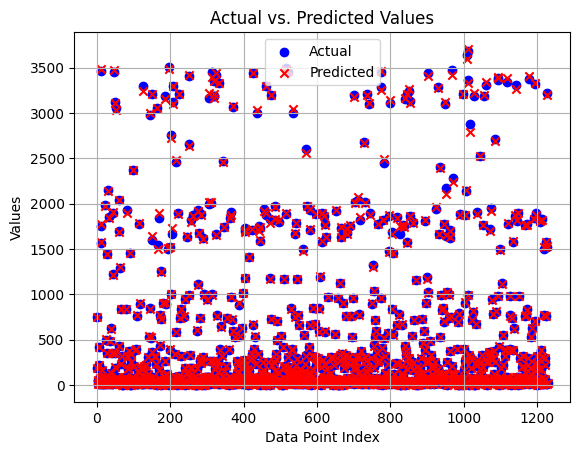

In [165]:
# Create an array of indices for the x-axis
indices = np.arange(len(y_test))

# Plot the actual values (y_test) as blue dots
plt.scatter(indices, y_test, label='Actual', color='blue', marker='o')

# Plot the predicted values (y_pred) as red crosses
plt.scatter(indices, y_pred, label='Predicted', color='red', marker='x')

plt.xlabel('Data Point Index')
plt.ylabel('Values')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.grid(True)
plt.show()